# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [ ]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [ ]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [ ]:
# Check the first few entries
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [ ]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [ ]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [ ]:
# Check the summary of the dataset
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [ ]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [ ]:
# Check the number of missing values in each column
display(df.isnull().sum())

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [ ]:
# Check the percentage of missing values in each column
(df.isnull().sum()/len(df))*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [ ]:
# Handle the missing value rows in the column
df = df.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [ ]:
# Check the percentage of remaining data after missing values are removed
original_rows = 74610
current_rows = df.shape[0]

remaining_percentage = (current_rows / original_rows) * 100
print(f"Remaining data: {remaining_percentage:.2f}% ({current_rows} out of {original_rows} rows)")

Remaining data: 94.67% (70635 out of 74610 rows)


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [ ]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_categorical_values(df):
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        print(f"Column: {col}")
        print(df[col].value_counts())
        print("-" * 30)

In [ ]:
# Check the data
check_categorical_values(df)

Column: Gender
Gender
Male      38700
Female    31935
Name: count, dtype: int64
------------------------------
Column: Job Role
Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64
------------------------------
Column: Work-Life Balance
Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64
------------------------------
Column: Job Satisfaction
Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64
------------------------------
Column: Performance Rating
Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: count, dtype: int64
------------------------------
Column: Overtime
Overtime
No     47588
Yes    23047
Name: count, dtype: int64
------------------------------
Column: Education Level
Education Level
Bachelorâ€

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [ ]:
# Drop redundant columns which are not required for modelling
df = df.drop('Employee ID', axis=1)

In [ ]:
# Check first few rows of data
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0       Mid       Medium   
1       No  ...                     3       Mid       Medium   
2       No  ...                     3       Mid       Medium   
3       No  ...                     2       Mid        Small   
4      Yes  ...                     0    Senior       Medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          No                       No   
1                        21.0          No                       No   
2                        74.0          No                       No   
3                        50.0         Yes                       No   
4                        68.0          No                       No   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        No          Excellent               Medium    Stayed  
1                        No               Fair                  Low    Stayed  
2                        No               Poor                  Low    Stayed  
3                        No               Good               Medium    Stayed  
4                        No               Fair               Medium    Stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [ ]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [ ]:
# Put all the feature variables in X
X = df.drop('Attrition', axis=1)

# Put the target variable in y
y = df['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [ ]:
# Split the data into 70% train data and 30% validation data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [ ]:
# Select numerical columns
numerical_cols_train = X_train.select_dtypes(include=np.number).columns

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

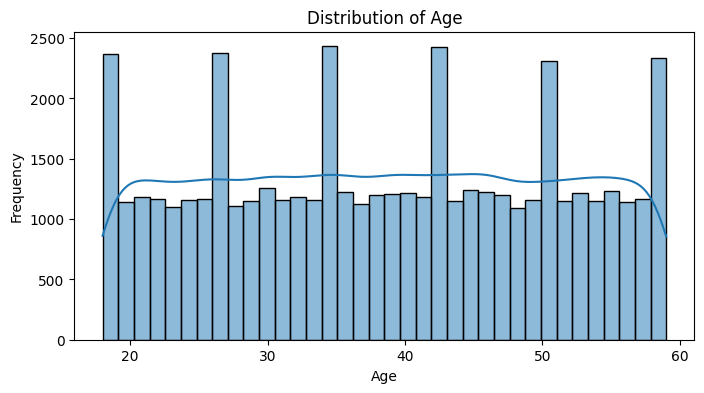

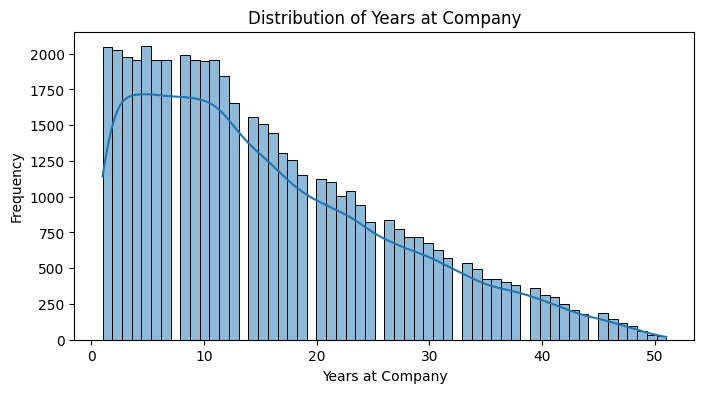

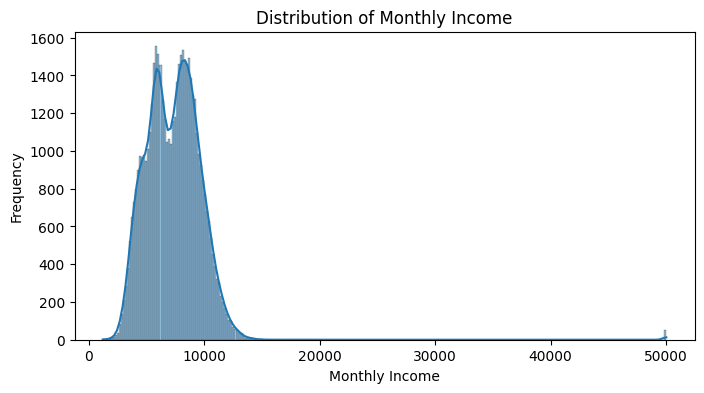

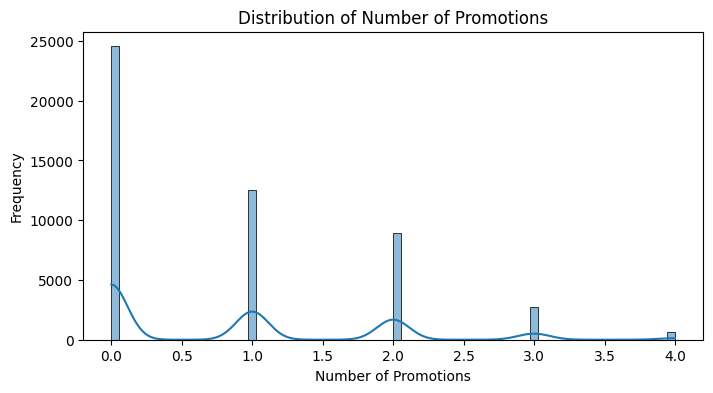

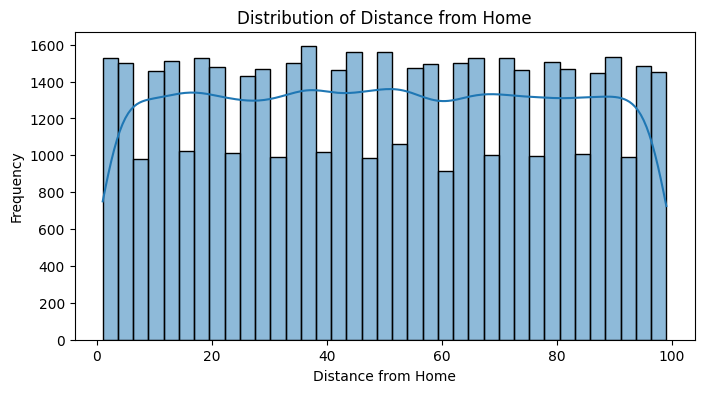

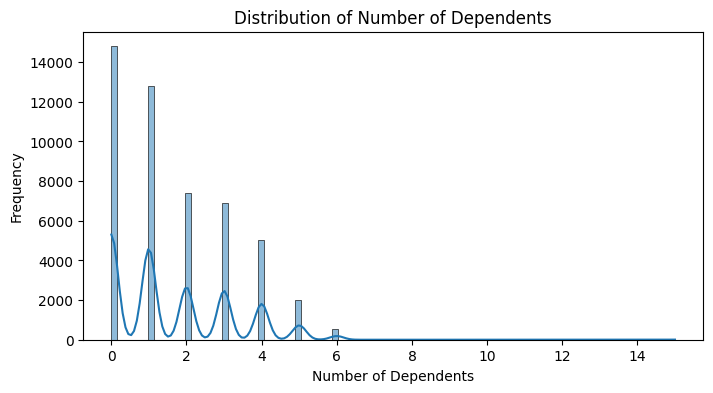

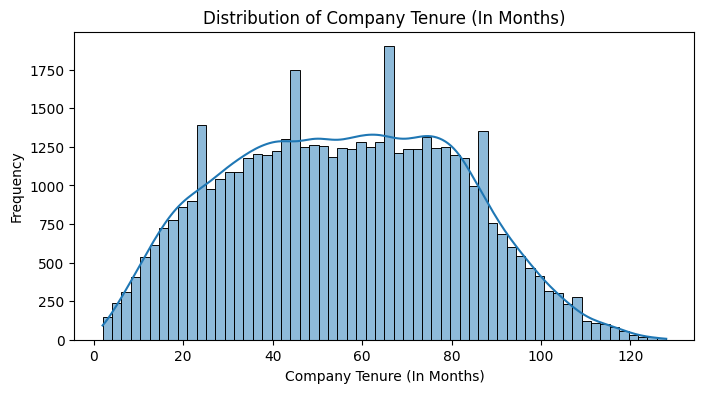

In [ ]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols_train:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=X_train, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

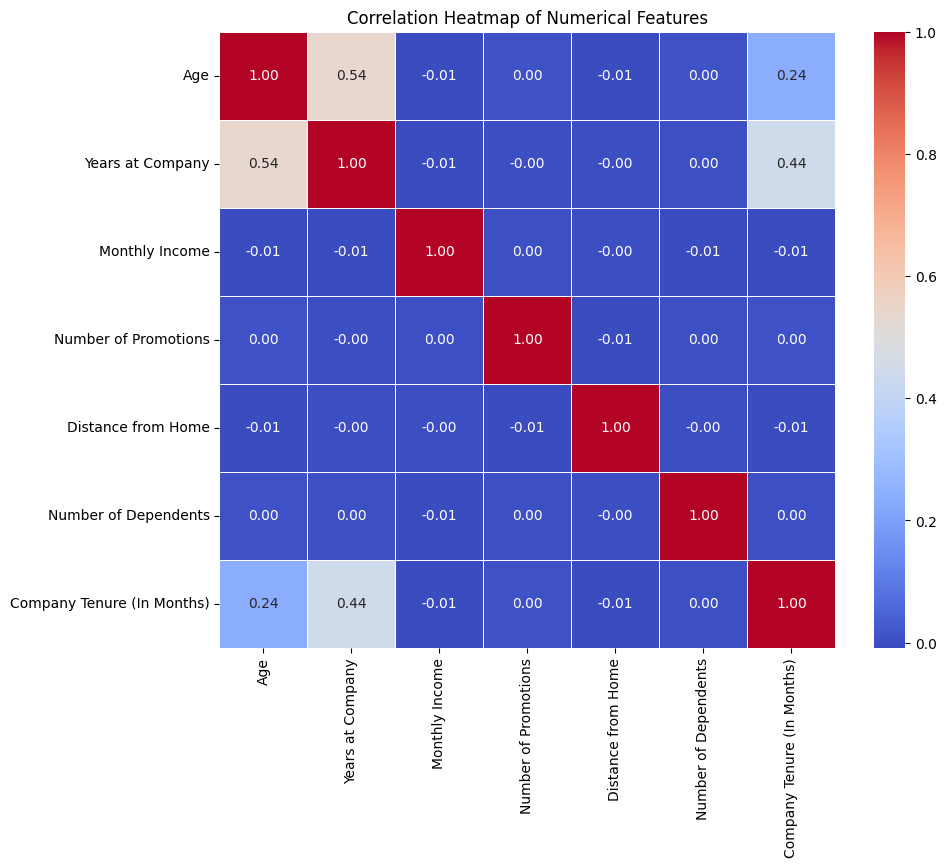

In [ ]:
# Create correlation matrix for numerical columns
correlation_matrix = X_train[numerical_cols_train].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

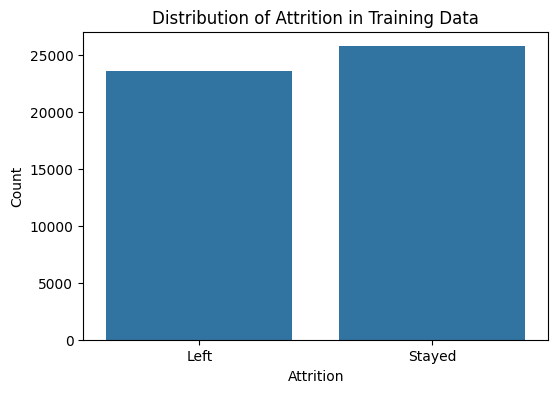

In [ ]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Attrition in Training Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

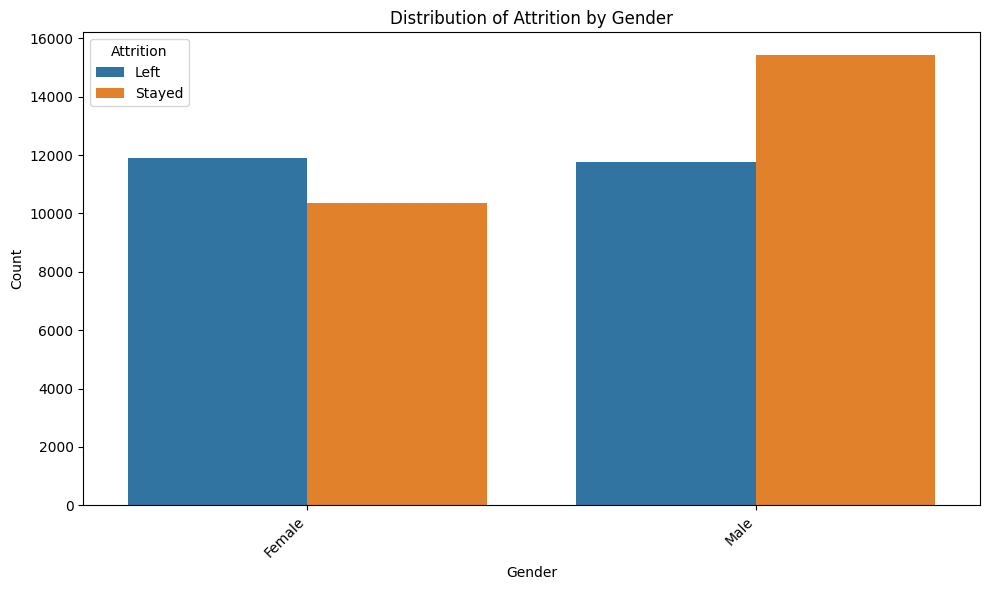

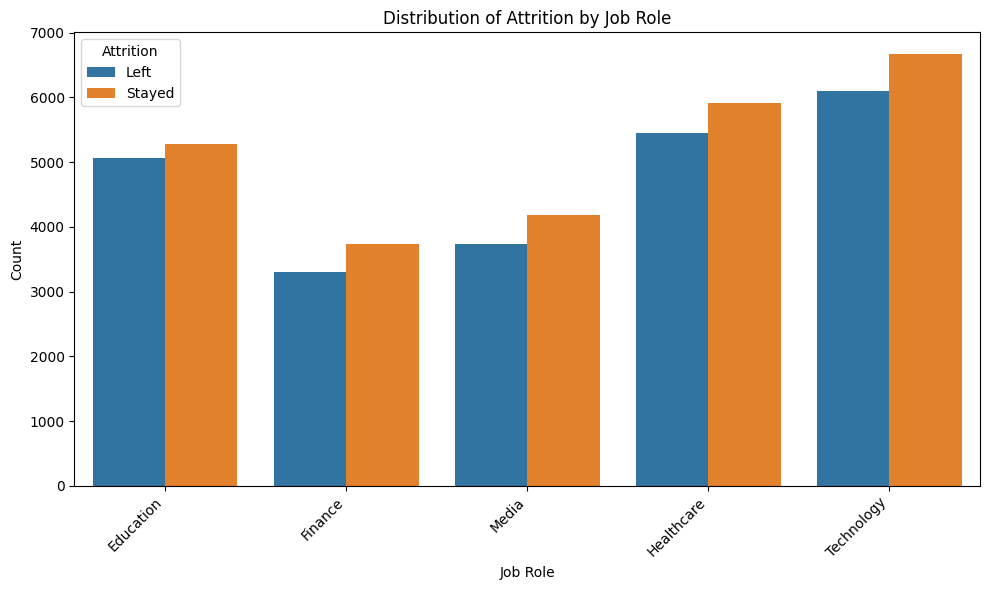

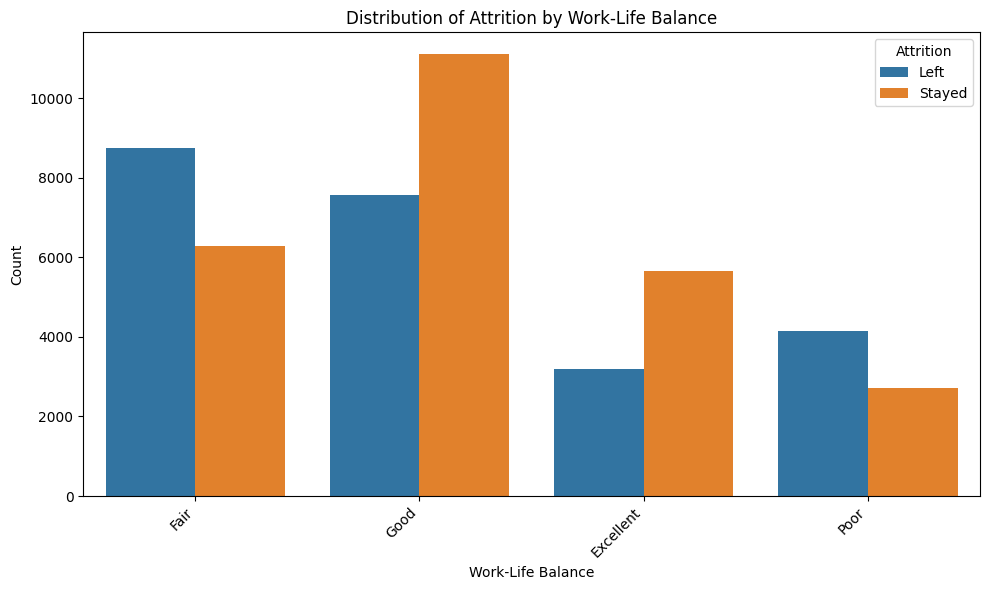

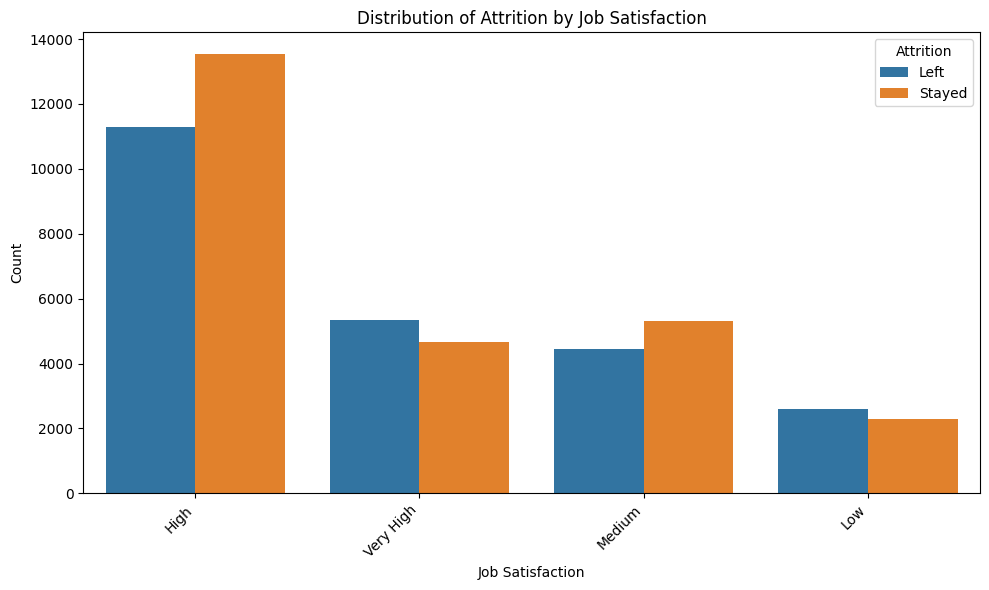

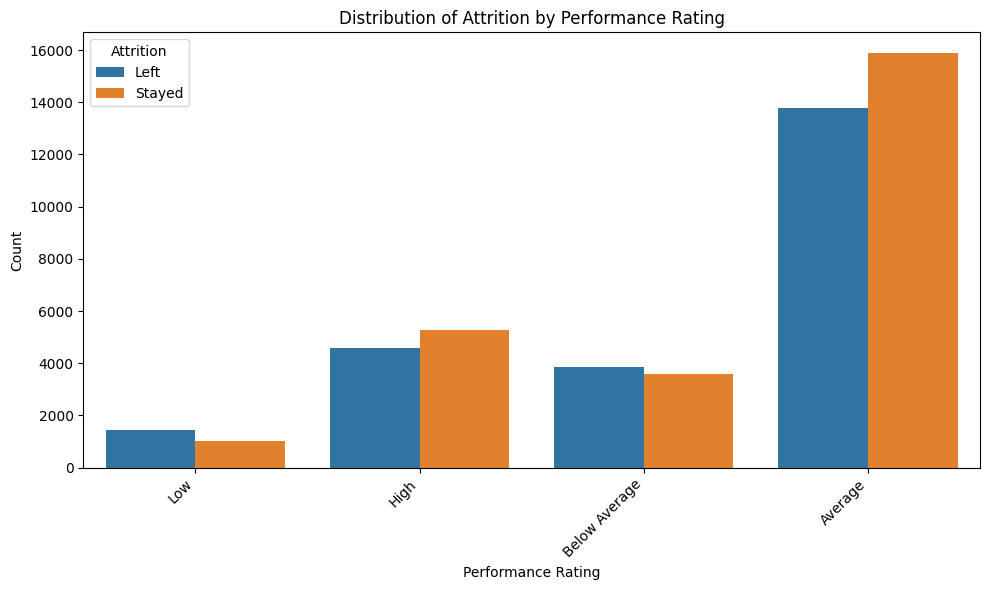

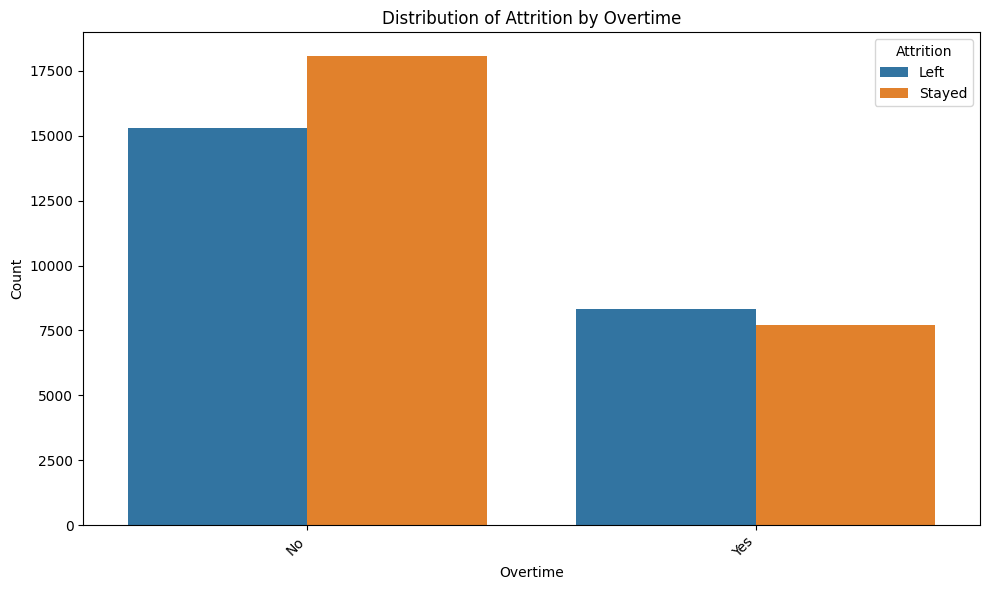

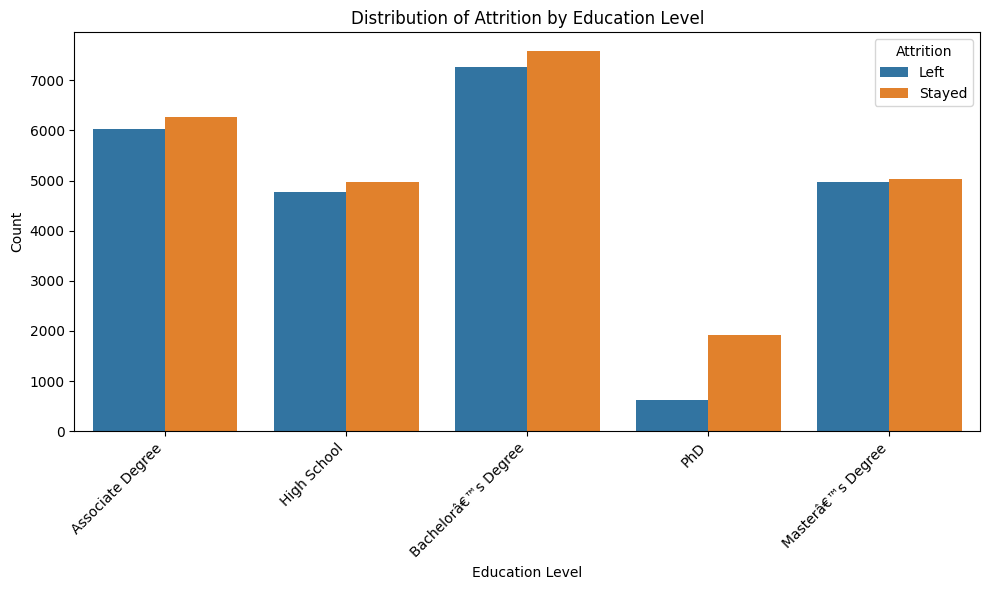

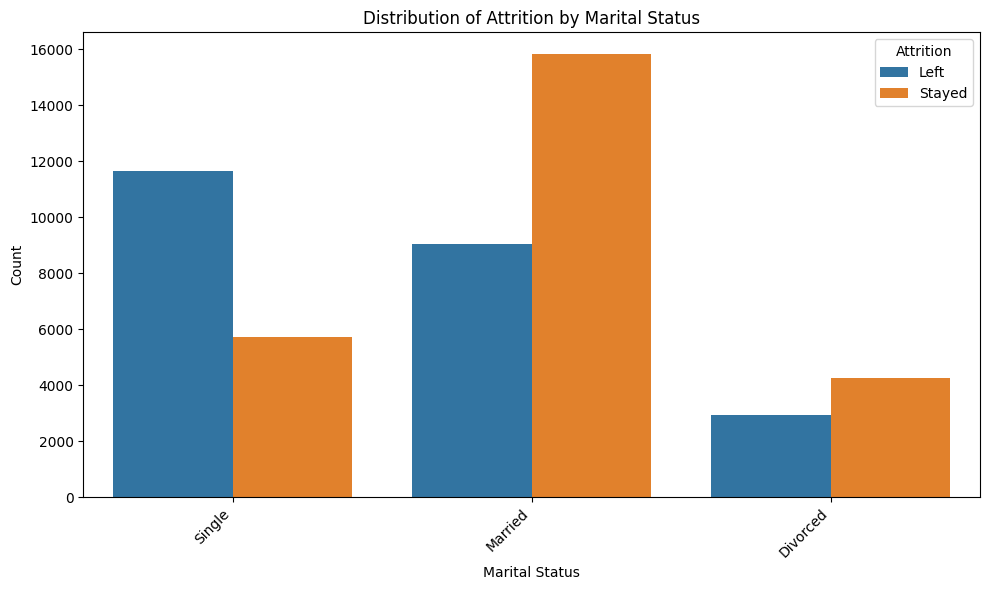

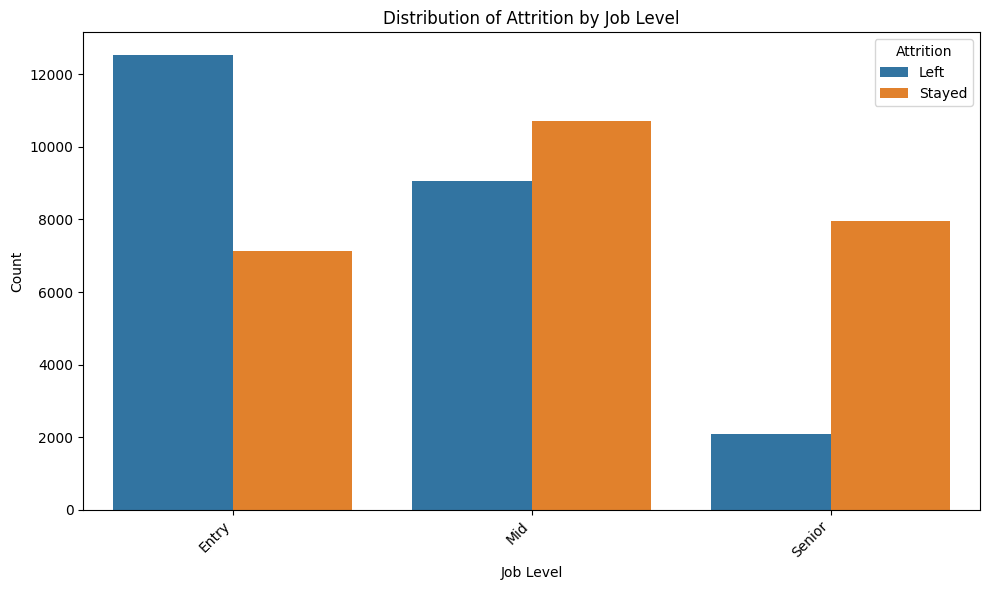

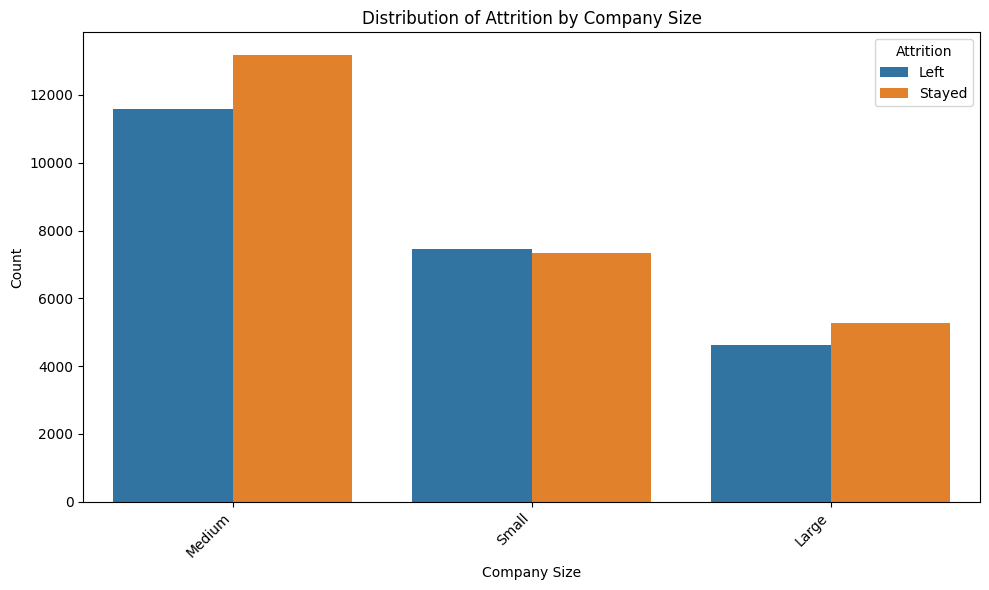

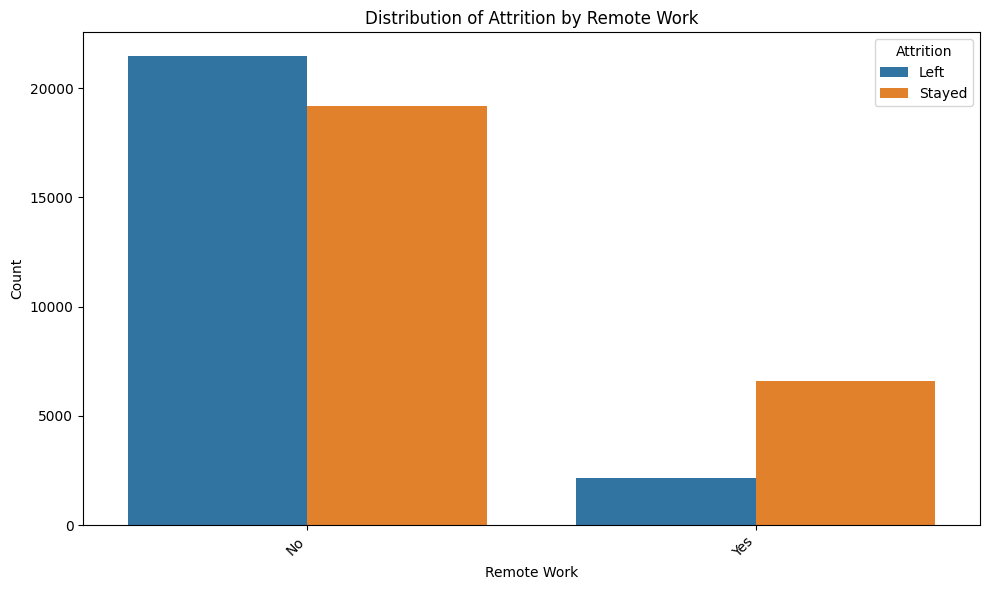

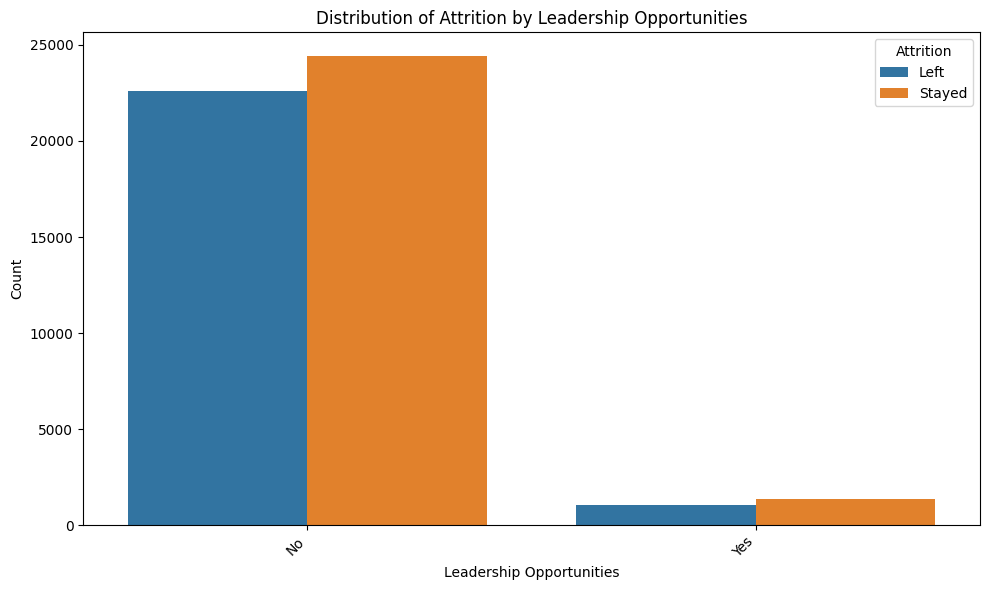

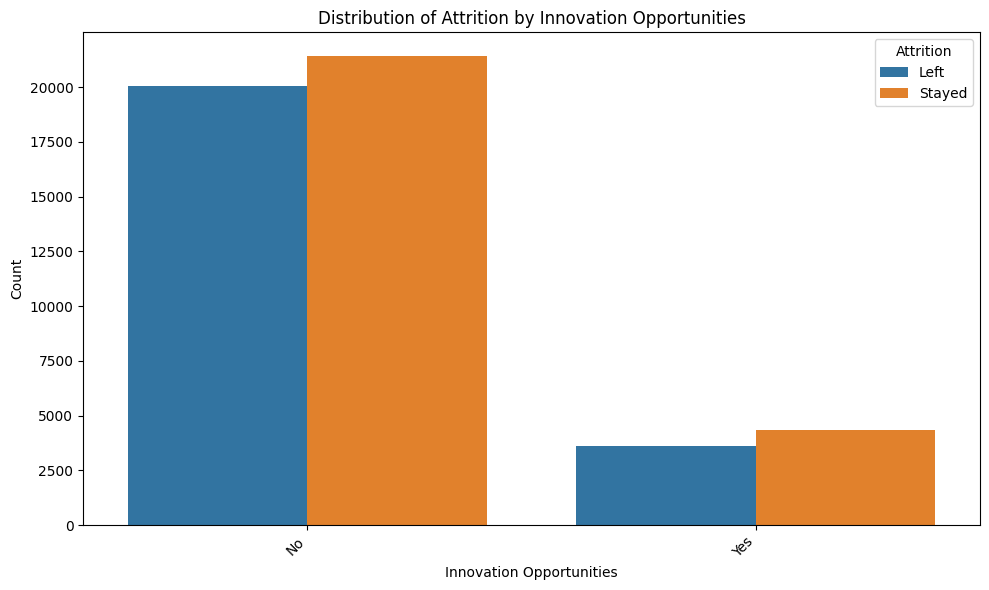

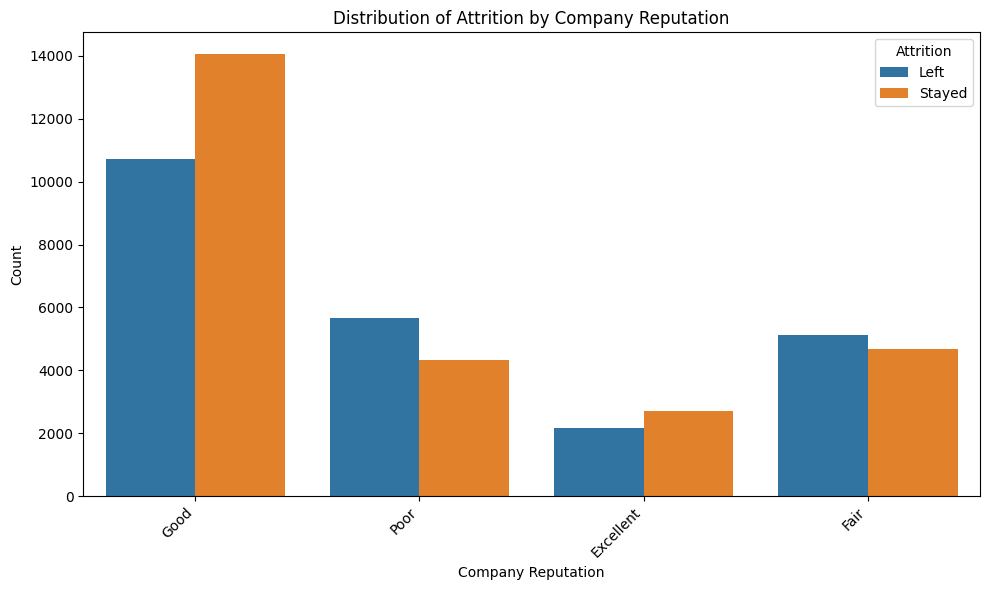

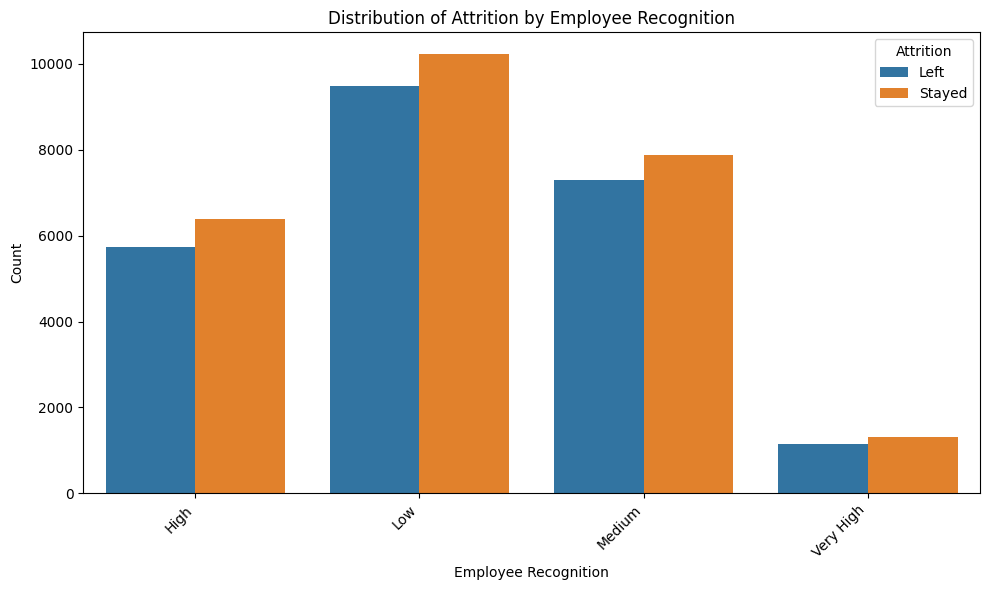

In [ ]:
# Plot distribution for each categorical column with target variable
categorical_cols_train = X_train.select_dtypes(include='object').columns

for col in categorical_cols_train:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train.assign(Attrition=y_train), x=col, hue='Attrition')
    plt.title(f'Distribution of Attrition by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [ ]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [ ]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [ ]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [ ]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [ ]:
# Check the categorical columns
categorical_cols_train = X_train.select_dtypes(include='object').columns
print(categorical_cols_train)

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[categorical_cols_train], drop_first=True)

# Add the results to the master DataFrame
X_train = pd.concat([X_train, X_train_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(categorical_cols_train, axis=1)
display(X_train.head())

Age  Years at Company  Monthly Income  Number of Promotions  \
41465   46                26            4617                     2   
69350   43                26            4447                     3   
28247   27                 8            9762                     0   
3217    47                29            5244                     2   
73636   25                10            4455                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465                59.0                     2                        92.0   
69350                64.0                     0                       103.0   
28247                84.0                     1                        16.0   
3217                 59.0                     1                        74.0   
73636                36.0                     0                        62.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
41465        False             False                False  ...   
69350         True             False                False  ...   
28247         True              True                False  ...   
3217         False             False                False  ...   
73636        False             False                False  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
41465               False            False                         False   
69350                True            False                         False   
28247               False            False                         False   
3217                False            False                         False   
73636               False            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
41465                         False                    False   
69350                          True                    False   
28247                          True                    False   
3217                          False                    False   
73636                         False                    False   

       Company Reputation_Good  Company Reputation_Poor  \
41465                     True                    False   
69350                    False                     True   
28247                     True                    False   
3217                     False                    False   
73636                     True                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
41465                     False                        False   
69350                      True                        False   
28247                      True                        False   
3217                       True                        False   
73636                     False                         True   

       Employee Recognition_Very High  
41465                           False  
69350                           False  
28247                           False  
3217                            False  
73636                           False  

[5 rows x 41 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
X_validation_dummies = pd.get_dummies(X_validation[categorical_cols_train], drop_first=True)


# Add the results to the master DataFrame
X_validation = pd.concat([X_validation, X_validation_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop categorical columns and check the DataFrame
X_validation = X_validation.drop(columns=categorical_cols_train)
display(X_validation.head())

Age  Years at Company  Monthly Income  Number of Promotions  \
23813   46                 1            7740                     3   
14537   32                 6            8779                     1   
45192   53                10           11683                     1   
13765   50                 2            7305                     2   
3411    48                24           10114                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
23813                78.0                     2                         3.0   
14537                91.0                     0                        35.0   
45192                71.0                     1                        39.0   
13765                71.0                     1                         3.0   
3411                  2.0                     1                        64.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
23813         True             False                 True  ...   
14537         True              True                False  ...   
45192         True             False                False  ...   
13765        False             False                False  ...   
3411          True             False                 True  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
23813                True            False                         False   
14537               False             True                         False   
45192               False            False                         False   
13765               False            False                         False   
3411                False            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
23813                         False                    False   
14537                         False                    False   
45192                         False                    False   
13765                          True                     True   
3411                          False                    False   

       Company Reputation_Good  Company Reputation_Poor  \
23813                     True                    False   
14537                    False                     True   
45192                     True                    False   
13765                    False                    False   
3411                     False                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
23813                      True                        False   
14537                     False                        False   
45192                     False                         True   
13765                     False                        False   
3411                      False                        False   

       Employee Recognition_Very High  
23813                           False  
14537                           False  
45192                           False  
13765                           False  
3411                            False  

[5 rows x 41 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [ ]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_validation = pd.DataFrame(y_validation)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train, drop_first=True)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
y_validation_dummies = pd.get_dummies(y_validation, drop_first=True)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [ ]:
# Drop redundant columns from both train and validation
# This step is no longer necessary as categorical columns were handled and the target variable is kept.

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [ ]:
# Scale the numeric features present in the training set
scaler = StandardScaler()
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])

# Scale the numerical features present in the validation set
X_validation[numerical_cols_train] = scaler.transform(X_validation[numerical_cols_train])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [ ]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train_dummies)

In [ ]:
# Display the features selected by RFE
display(X_train.columns[rfe.support_])

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [ ]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [ ]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [ ]:
# View the training data
display(X_train.head())

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
41465        False                    True                   False   
69350         True                   False                   False   
28247         True                   False                   False   
3217         False                    True                   False   
73636        False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
41465                 False                       False   
69350                 False                       False   
28247                 False                        True   
3217                  False                       False   
73636                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
41465                             False                    True         False   
69350                             False                   False         False   
28247                              True                   False          True   
3217                              False                   False          True   
73636                             False                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
41465                False                   True          False   
69350                False                   True          False   
28247                False                   True           True   
3217                  True                  False           True   
73636                False                   True          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
41465             False            False                    False   
69350             False            False                    False   
28247             False            False                    False   
3217              False            False                    False   
73636             False            False                    False   

       Company Reputation_Poor  
41465                    False  
69350                     True  
28247                    False  
3217                     False  
73636                    False

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [ ]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
y_train_numeric = y_train_dummies.astype(float)

X_train_sm = sm.add_constant(X_train[col].astype(float))

logit_model = sm.Logit(y_train_numeric, X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506106
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Mon, 28 Jul 2025   Pseudo R-squ.:                  0.2689
Time:                        03:48:19   Log-Likelihood:                -25024.
converged:                       True   LL-Null:                       -34226.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2601      0.028      9.20

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

Features   VIF
0                              const  7.17
11                     Job Level_Mid  1.20
12                  Job Level_Senior  1.20
2             Work-Life Balance_Fair  1.08
3             Work-Life Balance_Poor  1.08
14           Company Reputation_Fair  1.07
15           Company Reputation_Poor  1.07
4               Job Satisfaction_Low  1.03
5         Job Satisfaction_Very High  1.03
6   Performance Rating_Below Average  1.01
7             Performance Rating_Low  1.01
1                        Gender_Male  1.00
10             Marital Status_Single  1.00
9                Education Level_PhD  1.00
8                       Overtime_Yes  1.00
13                   Remote Work_Yes  1.00

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [ ]:
# Predict the probabilities on the training set
y_train_pred = result.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1, 1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [ ]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_df = pd.DataFrame(y_train_pred, columns=['Probability_Stayed'])
y_train_pred_df['Actual_Stayed'] = y_train_dummies['Attrition_Stayed'].reset_index(drop=True)
display(y_train_pred_df.head())

Probability_Stayed  Actual_Stayed
0            0.041969          False
1            0.165156          False
2            0.262070          False
3            0.785798          False
4            0.192069          False

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [ ]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_df['Predicted'] = y_train_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > 0.5 else 0)
display(y_train_pred_df.head())

Probability_Stayed  Actual_Stayed  Predicted
0            0.041969          False          0
1            0.165156          False          0
2            0.262070          False          0
3            0.785798          False          1
4            0.192069          False          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy

y_train_pred_df['Actual_Stayed'] = y_train_pred_df['Actual_Stayed'].astype(int)
y_train_pred_df['Predicted'] = y_train_pred_df['Predicted'].astype(int)

accuracy = metrics.accuracy_score(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Predicted'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [ ]:
# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Predicted'])
display(confusion_matrix)

array([[17082,  6577],
       [ 6320, 19465]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix.ravel()

print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

True Positive (TP): 19465
True Negative (TN): 17082
False Positive (FP): 6577
False Negative (FN): 6320


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.75


In [ ]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.72


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [ ]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")

Precision: 0.75


In [ ]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.2f}")

Recall: 0.75


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [ ]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def draw_roc(actual, probs):
    '''
    Plot ROC curve and calculate AUC
    '''
    fpr, tpr, thresholds = roc_curve(actual, probs)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--') # random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

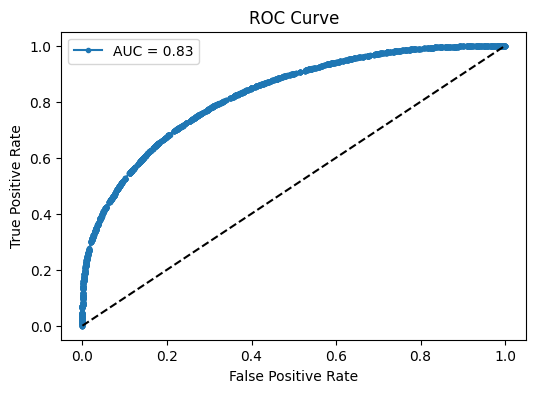

In [ ]:
# Call the ROC function
draw_roc(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Probability_Stayed'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in numbers:
    y_train_pred_df[f'Predicted_{i}'] = y_train_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > i else 0)

display(y_train_pred_df.head())

Probability_Stayed  Actual_Stayed  Predicted  Predicted_0.1  Predicted_0.2  \
0            0.041969              0          0              0              0   
1            0.165156              0          0              1              0   
2            0.262070              0          0              1              1   
3            0.785798              0          1              1              1   
4            0.192069              0          0              1              0   

   Predicted_0.3  Predicted_0.4  Predicted_0.5  Predicted_0.6  Predicted_0.7  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              1              1              1              1   
4              0              0              0              0              0   

   Predicted_0.8  Predicted_0.9  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])
from sklearn.metrics import confusion_matrix

# Iterate through the cutoffs and calculate the metrics
for i in numbers:
    cm1 = confusion_matrix(y_train_pred_df['Actual_Stayed'], y_train_pred_df[f'Predicted_{i}'])
    total = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total
    sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

display(cutoff_df)

probability  accuracy  sensitivity  specificity
0.1          0.1  0.590628     0.994687     0.150260
0.2          0.2  0.658260     0.964165     0.324866
0.3          0.3  0.704534     0.906535     0.484382
0.4          0.4  0.731312     0.840838     0.611945
0.5          0.5  0.739159     0.754896     0.722009
0.6          0.6  0.731211     0.645065     0.825098
0.7          0.7  0.704676     0.526779     0.898559
0.8          0.8  0.659069     0.385612     0.957099
0.9          0.9  0.588828     0.218732     0.992181

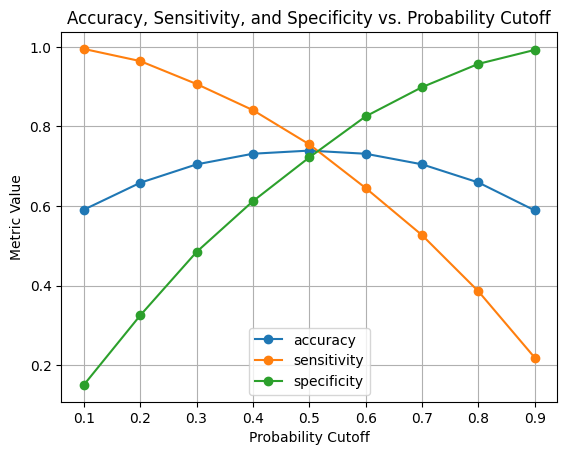

In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot(x='probability', y=['accuracy', 'sensitivity', 'specificity'], marker='o')
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [ ]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = 0.5
y_train_pred_df['Final_Predicted'] = y_train_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > optimal_cutoff else 0)
display(y_train_pred_df.head())

Probability_Stayed  Actual_Stayed  Predicted  Predicted_0.1  Predicted_0.2  \
0            0.041969              0          0              0              0   
1            0.165156              0          0              1              0   
2            0.262070              0          0              1              1   
3            0.785798              0          1              1              1   
4            0.192069              0          0              1              0   

   Predicted_0.3  Predicted_0.4  Predicted_0.5  Predicted_0.6  Predicted_0.7  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              1              1              1              1   
4              0              0              0              0              0   

   Predicted_0.8  Predicted_0.9  Final_Predicted  
0              0              0                0  
1              0              0                0  
2              0              0                0  
3              0              0                1  
4              0              0                0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [ ]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Final_Predicted'])
print(f"Accuracy with optimal cutoff ({optimal_cutoff}): {accuracy:.2f}")

Accuracy with optimal cutoff (0.5): 0.74


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [ ]:
# Create the confusion matrix once again
final_confusion_matrix = metrics.confusion_matrix(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Final_Predicted'])
display(final_confusion_matrix)

array([[17082,  6577],
       [ 6320, 19465]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = final_confusion_matrix.ravel()

print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

True Positive (TP): 19465
True Negative (TN): 17082
False Positive (FP): 6577
False Negative (FN): 6320


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.75


In [ ]:
# Calculate Specificity
specificity = tn / (tn + fp)
print(f"specificity: {specificity:.2f}")

specificity: 0.72


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")

Precision: 0.75


In [ ]:
# Calculate Recall
recall = sensitivity
print(f"Recall: {recall:.2f}")

Recall: 0.75


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [ ]:
# Check actual and predicted values from initial model
display(y_train_pred_df[['Actual_Stayed', 'Predicted']].head())

Actual_Stayed  Predicted
0              0          0
1              0          0
2              0          0
3              0          1
4              0          0

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

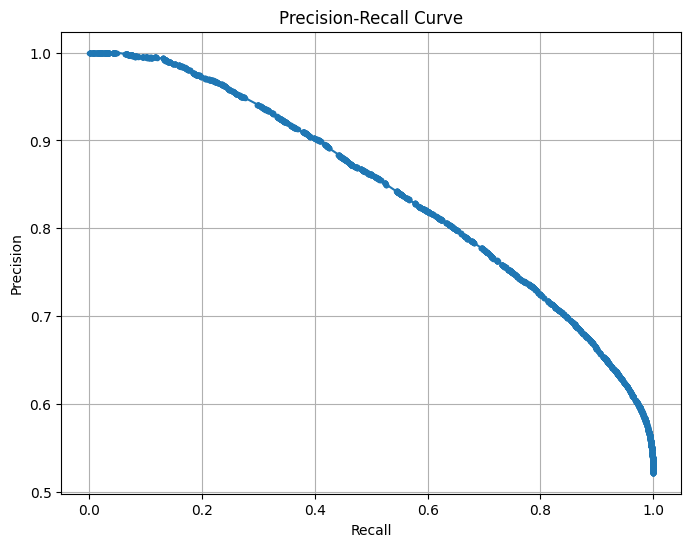

In [ ]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train_pred_df['Actual_Stayed'], y_train_pred_df['Probability_Stayed'])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# Select the relevant features for validation set
X_validation = X_validation[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation
X_validation_sm = sm.add_constant(X_validation)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Convert boolean columns in X_validation_sm to numeric
X_validation_sm[col] = X_validation_sm[col].astype(float)

# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(X_validation_sm)

# View predictions
display(y_validation_pred.head())

23813    0.946923
14537    0.266727
45192    0.396343
13765    0.083073
3411     0.940507
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Probability_Stayed'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_validation)

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)

y_validation_pred_df = pd.concat([predicted_probability, actual], axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_validation_pred_df['final_prediction'] = y_validation_pred_df['Probability_Stayed'].apply(lambda x: 1 if x > optimal_cutoff else 0)

# Check the DataFrame
display(y_validation_pred_df.head())

Probability_Stayed Attrition  final_prediction
0            0.946923    Stayed                 1
1            0.266727      Left                 0
2            0.396343      Left                 0
3            0.083073      Left                 0
4            0.940507    Stayed                 1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Calculate the overall accuracy
from sklearn.metrics import accuracy_score

y_validation_pred_df['Attrition_numeric'] = y_validation_pred_df['Attrition'].apply(lambda x: 1 if x == 'Stayed' else 0)

accuracy = accuracy_score(y_validation_pred_df['Attrition_numeric'], y_validation_pred_df['final_prediction'])
print(f"Accuracy on validation set: {accuracy:.2f}")

Accuracy on validation set: 0.74


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix
confusion_matrix_validation = confusion_matrix(y_validation_pred_df['Attrition_numeric'], y_validation_pred_df['final_prediction'])
display(confusion_matrix_validation)

array([[7360, 2806],
       [2779, 8246]])

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix_validation.ravel()

print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

True Positive (TP): 8246
True Negative (TN): 7360
False Positive (FP): 2806
False Negative (FN): 2779


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.75


In [ ]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.72


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")

Precision: 0.75


In [ ]:
# Calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.2f}")

Recall: 0.75


## Conclusion



**Based on the validation set results:**

- Accuracy of the model is around 0.74, indicating good overall performance.

- Sensitivity (recall for retained employees) is 0.75, suggesting that the model is able to correctly identify most of the employees who stayed.

- Specificity is 0.72, which means it effectively identifies employees who did not stay.

- Precision is 0.75, indicating that when the model predicts someone will stay, it is right 75% of the time.



These metrics show that the model performs well in distinguishing between employees who will stay and those who will leave.